(proj2_functions)=
# Project 2 Part 1: Functions

:::{epigraph}
Observational Studies

-- TODO your name here
:::

:::{admonition} Collaboration Statement
- TODO brief statement on the nature of your collaboration.
- TODO your collaborator's names here
:::

:::{tip}

You'll notice that the non-function cells of this notebook are contained in a `if __name__ == "__main__":` block. This indicates to Jupyter that the code should only be run when the file is executed directly, not when it is imported as a module. This will make importing your functions easier in Part 2. If you write additional tests or cells that are not functions, make sure to add them within a `if __name__ == "__main__":` block as well.
:::


## Part 1 Table of Contents and Rubric

| Section | Points |
|------------------------------------|-------|
| Propensity score matching | 2.5 |
| Math to code: inverse probability weighting and trimming| 1 |
| Visualization: Love plots for covariate balance | 1.5 |
| Total | 5 pts

## Notebook imports

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# 1. Propensity Score Matching

One of the observational study estimators we'll implement is the propensity score matching approach we discussed in class. We'll start by implementing a function for estimating the propensity score. This method should resemble the one you wrote in [Worksheet 4](ws4), except now we're fitting a logistic regression model via `smf.logit` instead of a linear regression model and returning the predicted propensity scores instead of the model object.

The predicted propensity scores can be accessed via the `predict` method of the model object, which takes a dataframe as an argument:

```python
# Generates predictions, assuming the model was previously fit with a dataframe called df
model.predict(df)
```

You can also refer to [Activity 8](activity8) for the syntax for creating a logistic regression model in `statsmodels`.


In [124]:
def fit_propensity_score(df, treatment, covariates):
    """
    Fits a propensity score model using the covariates and treatment assignment.

    Args:
        df (pd.DataFrame): The dataframe containing the covariates and treatment assignment.
        treatment (str): The name of the treatment variable.
        covariates (list[str]): The list of covariates to include in the propensity score model.

    Returns:
        pd.Series: A series of the fitted propensity scores.
    """
    # TODO your code here
    pass

In [ ]:
#### test fit_propensity_score ####
if __name__ == "__main__":
    test_df = pd.DataFrame({'X': [0, 6, 5], 'T': [0, 0, 1]})
    test_preds = fit_propensity_score(test_df, 'T', ['X'])
    assert test_preds.shape[0] == test_df.shape[0], "The predictions should have the same number of elements as the input dataframe"

    # these tests are not exhaustive, so adding additional asserts and test cases is recommended
    print("All asserts for fit_propensity_score passed!")

Next, we'll implement **pair matching without replacement** using a greedy algorithm.

This is the most complicated estimator we'll implement in this project, so it is broken into two functions:

- `select_closest_control_unit`: selects the closest control unit to the given treated propensity score/
- `greedy_pair_match`: builds a pair matched dataframe for the treated units.


:::{tip} 

There are comments in the function stubs that provide a suggested implementation, as well as assert statements that you can use to test your code. The assert statements are not exhaustive, so I recommend adding more of your own tests while developing your code, and submitting to the autograder to check for correctness.

:::

For `select_closest_control_unit`, we'll need to calculate the absolute difference in propensity scores between the treated and control units, find the row in the `control_df` that has the minimum distance, and drop that row from the `control_df`. The following functions will be useful:

- [np.abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html): calculates the absolute value of an array or pd.Series
- [df['column'].idxmin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html): finds the index of the row with the minimum value in given `'column'`, which can be used to find the row with the minimum distance
- [df.drop(index=idx)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html): drops the row with the index specified by `idx` -- this should be the index produced by your call to `idxmin()`

Below is a demonstration of the `idxmin()` and `drop()` functions. Feel free to use this as a reference in your implementation:


In [125]:
if __name__ == "__main__":
    # generate a test dataframe
    test_df = pd.DataFrame({'X1': [5, 0, 10, 15, 20], 'X2': ["a", "b", "c", "d", "e"]})
    print("The test dataframe is: ")
    display(test_df)

    # find the index of the row with the minimum value in the 'X1' column
    idx = test_df['X1'].idxmin()
    print("The row index with the minimum value in the 'X1' column is: ", idx)

    # drop the row with the index specified by `idx`
    test_df = test_df.drop(index=idx)
    print("The dataframe after dropping the row with the index specified by idx is: ")
    display(test_df)

The test dataframe is: 


,X1,X2
0,5,a
1,0,b
2,10,c
3,15,d
4,20,e


The row index with the minimum value in the 'X1' column is:  1
The dataframe after dropping the row with the index specified by idx is: 


,X1,X2
0,5,a
2,10,c
3,15,d
4,20,e


In [126]:
def select_closest_control_unit(control_df, prop_score_treated, prop_score_col='propensity_score'):
    """
    Selects the closest control unit to the given treated propensity score.

    Returns a tuple with two elements:
    - the first element is a pd.Series with a single row that corresponds to the control unit that is closest to the treated unit.
    - the second element is a pd.DataFrame with the remaining control units.

    Args:
        control_df (pd.DataFrame): The dataframe containing the control units.
        prop_score_treated (float): The propensity score of the treated unit.
        prop_score_col (str): The name of the propensity score column, default is 'propensity_score'

    Returns:
        (pd.Series, pd.DataFrame): A tuple of the matched control unit row and the remaining control units
    """
    closest_control_row = None 
    control_df = control_df.copy()
    
    # TODO your code here

    # Calculate the absolute difference in propensity scores, store in a new column called 'distance'

    # The closest control unit is the one with the minimum distance

    # Drop the matched control unit from the pool

    # Return the matched control unit and the remaining control units
    return closest_control_unit, control_df

In [ ]:
#### test cases for select_closest_control_unit ####
if __name__ == "__main__":
    test_df = pd.DataFrame({'propensity_score': [0.1, 0.2, 0.3], 'treatment': [0, 0, 0]})

    # test select_closest_control_unit with no caliper
    sel_row, updated_df = select_closest_control_unit(test_df, prop_score_treated=0.1)
    assert sel_row['propensity_score'] == 0.1, "The closest control unit should have the propensity score of 0.1"
    assert updated_df.shape[0] == 2, "There should be 2 control units remaining"

    # These tests are not exhaustive, so adding additional asserts and test cases is recommended
    print("All asserts for select_closest_control_unit passed!")

The overall approach to implementing this matching procedure is given in the following pseudocode:

```none
For every treated unit t:
    Select the closest control unit c 
    Add (t, c) to the matched units list
    Remove c from the pool of control units

Return the matched units list as a dataframe
```

This process is "greedy" because we always select the closest control unit within the caliper distance for each treated unit, without considering the possibility of that control unit being a better match for another treated unit. For example, suppose the first treated unit we process has a propensity score of 0.1, and the closest control unit has a propensity score of 0.2. We make that match, and then move on to the next treated unit. However, there may be another treated unit later on in our dataset with a propensity score of 0.19 that would have been a better match for the control unit with a propensity score of 0.2.

Your implementation should make use of the following pandas functions:

- [df.iterrows()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) to iterate through the treated units
- [df.sort_values()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) to sort the dataframe by a given column, which speeds up the matching process

Below is a demonstration of the `iterrows()` and `sort_values()` methods, which you can use as a reference in your implementation:



In [127]:
if __name__ == "__main__":
    # generate a test dataframe
    print("The test dataframe is: ")
    test_df = pd.DataFrame({'X1': [5, 0, 10], 'X2': ["a", "b", "c"]})
    display(test_df)

    # sort the dataframe by the X1 column
    test_df = test_df.sort_values(by='X1')
    print("The test dataframe sorted by the X1 column is: ")
    display(test_df)

    # uncomment to iterate through the dataframe
    # for index, row in test_df.iterrows():
    #     print(f"The row at index {index} is: ")
    #     print(row)

    #     # we can also access particular columns of the row
    #     print(f"The value of X1 is: {row['X1']}")
    #     print()

The test dataframe is: 


,X1,X2
0,5,a
1,0,b
2,10,c


The test dataframe sorted by the X1 column is: 


,X1,X2
1,0,b
0,5,a
2,10,c


In [128]:
def greedy_pair_match(df, treat_col, prop_score_col='propensity_score'):
    """
    Implements a greedy pair matching estimator without replacement.

    Args:
        df (pd.DataFrame): The dataframe containing the covariates and treatment assignment.
        treat_col (str): The name of the treatment variable column, assumed to be binary
        prop_score_col (str): The name of the propensity score column, default is 'propensity_score'

    Returns:
        pd.DataFrame: A new dataframe of the matched data, which should have the same columns as the input dataframe.
    """
    df = df.copy()

    # TODO your code here
    
    # Sort the dataframe by the propensity score to make the matching faster

    # Separate out the treated and control units

    # Iterate through the treated units and call the select_closest_control_unit 
    # to find the closest control unit

    # add both the matched treated and control units to the matched_units_list

    # Create a dataframe from the matched_units_list
    matched_df = pd.DataFrame(matched_units_list)

    # Drop the distance column to clean up the dataframe
    matched_df = matched_df.drop(columns=['distance'])

    # Return the matched dataframe
    return matched_df

In [ ]:
#### test cases for greedy_pair_match ####
if __name__ == "__main__":
    test_df = pd.DataFrame({'propensity_score': [0.1, 0.2, 0.3, 0.33, 0.21], 
                            'treatment':        [  0,   0,   0,    1,    1]})
    matched_df = greedy_pair_match(test_df, treat_col='treatment')
    assert matched_df.shape[0] == 4, "There should be 2 matched pairs, for a total of 4 rows"

    # these tests are not exhaustive, so adding additional asserts and test cases is recommended
    print("All asserts for greedy_pair_match passed!")

:::{admonition} Optional reading

If you'd like to see additional discussion of this matching implementation, you can refer to the "Propensity Score Matching" section of the [Austin 2011](https://www.tandfonline.com/doi/pdf/10.1080/00273171.2011.568786) paper from Worksheet 4, beginning on page 405 with "The analysis of a propensity score..."

:::

# 2. Trimming and Inverse Probability Weighting (IPW)

As we saw in [class](https://moodle.mtholyoke.edu/pluginfile.php/1453178/mod_resource/content/1/lec10-propensity-scores.pdf), sometimes there are regions of the propensity score distribution where there is no overlap between the treated and control units, or where there are very few units in either the treated or control group. To address potential positivity violations, we can trim the propensity score distribution to only include the units with propensity scores within a certain range. Implement the `trim_dataframe` function below to do this. Recall from [Worksheet 2](ws2) how we can use logical indexing in pandas to select the rows of the dataframe that meet a certain condition.


In [129]:
def trim_dataframe(df, prop_score_col='propensity_score', lower_bound=0.05, upper_bound=0.95):
    """
    Trims the dataframe to only include the units with propensity scores within a certain range.

    Args:
        df (pd.DataFrame): The dataframe to trim.
        prop_score_col (str): The name of the propensity score column, default is 'propensity_score'
        lower_bound (float): The lower bound of the propensity score range, default is 0.05
        upper_bound (float): The upper bound of the propensity score range, default is 0.95

    Returns:
        pd.DataFrame: The trimmed dataframe.
    """
    df = df.copy()

    # TODO your code here

    return df

In [ ]:
#### test cases for trim_dataframe ####
if __name__ == "__main__":
    # test where no trimming is needed
    test_df = pd.DataFrame({'propensity_score': [0.1, 0.2, 0.3, 0.33, 0.21]})
    trimmed_df = trim_dataframe(test_df, prop_score_col='propensity_score', lower_bound=0.05, upper_bound=0.95)
    assert trimmed_df.shape[0] == test_df.shape[0], "No units are trimmed, so the dataframe should not change"

    # these tests are not exhaustive, so adding additional asserts and test cases is recommended
    print("All asserts for trim_dataframe passed!")

Another approach to estimate causal effects in observational data is to use the propensity score to assign different weights to the units. The intuition is to weight the units by the inverse of their propensity score so that treated and control units are balanced based on their likelihood of being treated. Hence, this method is known as **inverse probability weighting** (IPW).

We perform this weighting to estimate the average treatment effect on the treated (ATT) by updating the outcome variable $Y$ as follows:

$$
Y_{i, \text{IPW}} = w_i \times Y_i
$$

With the weights $w_i$ given by:

$$
w_i = \frac{T_i - e_i}{1 - e_i}
$$

where $T_i$ is the treatment assignment for unit $i$ and $e_i$ is the propensity score for unit $i$. The ATT estimate is then given by the following formula:

$$
\widehat{ATT}_{\text{IPW}} = \frac{1}{n_1} \sum_{i=1}^n Y_{i, \text{IPW}}
$$

where $n_1$ is the number of treated units, that is: $n_1 = \sum_{i=1}^n T_i$.


 Implement the `ipw_att` function below to perform this weighted estimation of the ATT.

:::{tip}

Because of the way numpy and pandas handle columns and arrays and how you can subtract constants from pandas columns, you should be able to perform this weighting by directly translating the formulas above into code.

:::

In [130]:
def ipw_att(df, outcome_col, treat_col, prop_score_col='propensity_score'):
    """
    Performs inverse probability weighting to estimate the ATT.

    Args:
        df (pd.DataFrame): The dataframe containing the data to be weighted
        outcome_col (str): The name of the outcome variable column
        treat_col (str): The name of the treatment variable column
        prop_score_col (str): The name of the propensity score column, default is 'propensity_score'

    Returns:
        float: The ATT estimate
    """
    df = df.copy()

    # TODO your code here

    # calculate the weights based on the formula above

    # calculate the IPW weighted outcome

    # calculate the ATT estimate

    return 0

In [ ]:
#### test ipw_outcome ####
if __name__ == "__main__":
    test_df = pd.DataFrame({'propensity_score': [0.2, 0.2],
                            'treatment':        [  0,   1],
                            'outcome':          [  1,   2]})
    est_att = ipw_att(test_df, outcome_col='outcome', treat_col='treatment', prop_score_col='propensity_score')
    assert np.isclose(est_att, 1.75), "The estimated ATT should be 2 - (0.2 / (1 - 0.2)) = 1.75"
    
    # these tests are not exhaustive, so adding additional asserts and test cases is recommended
    print("All asserts for ipw_att passed!")

# 3. Love plots for visualizing covariate balance

A popular visualization for assessing covariate balance before and after matching is called a "Love" plot, originally proposed by researcher Thomas E. Love. Below is an example of a Love plot from [Ahmed et al. 2006](https://pmc.ncbi.nlm.nih.gov/articles/PMC2443408/), where propensity score matching was used to balance the covariate distributions in a study of the effect of diuretic drugs on heart failure:

![](https://cdn.ncbi.nlm.nih.gov/pmc/blobs/2338/2443408/dcccccef4c4e/nihms-10609-f0001.jpg)

The y-axis shows all of the covariates that the authors included in their propensity score model, while the x-axis shows the **standardized difference** between the treated and control units for each covariate. The open circles represent the original, unmatched data, while the solid diamonds represent the data after propensity score matching was applied. If the matching process does a good job of balancing the treated and control units, the standardized differences should approach 0 for all of the covariates. A rule of thumb in practice is that the absolute value of the standardized differences should be less than 0.1 for all of the covariates in order to have good balance, which is also indicated by the vertical line in their plot.



We'll implement a function for generating love plots for our subsequent analyses. The first step is to calculate the standardized difference $d_X$ for a given covariate $X$, which is defined as:

$$
d_X = \frac{\hat{E}[X \mid T=1] - \hat{E}[X \mid T=0]} { \large \sqrt{\frac{\hat{V}[X \mid T=1] + \hat{V}[X \mid T=0]} {2}}}
$$

Where $\hat{E}[X \mid T=1]$ is the estimated expectation (mean) of the covariate $X$ for the treated units and $\hat{V}[X \mid T=1]$ is the estimated variance of the covariate $X$ for the treated units. The math here can be translated into code through the use of the following pandas and numpy functions:

- [np.sqrt](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html): computes the square root of an array or pd.Series
- [df['column'].mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html): computes the mean of the values in `'column'`
- [df['column'].var()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.var.html): computes the estimated variance of the values in `'column'`


Implement the `standardized_difference` function below to calculate the standardized difference for a given covariate:




In [131]:
def standardized_difference(df, covariate, treat_col):
    """
    Calculates the standardized difference for a given covariate between treated and control units.

    Args:
        df (pd.DataFrame): The dataframe containing the data to be analyzed
        covariate (str): The name of the covariate to analyze
        treat_col (str): The name of the treatment variable column

    Returns:
        float: The standardized difference for the given covariate
    """
    # TODO your code here

    # Calculate the mean and variance of the covariate for the treated and control units

    # Calculate the standardized difference
    std_diff = 0
    
    return std_diff

In [ ]:
#### test standardized_difference ####
if __name__ == "__main__":
    test1_df = pd.DataFrame({'covariate':        [0.1, 0.2, 0.1, 0.4],
                            'treatment':        [  0,   1,   0,   1]})
    std_diff = standardized_difference(test1_df, 'covariate', 'treatment')
    assert np.isclose(std_diff, 2), "The standardized difference should be 2"

    # these tests are not exhaustive, so adding additional asserts and test cases is recommended
    print("All asserts for standardized_difference passed!")

Next, we'll implement a function for building a dataframe of standardized differences for plotting, `std_diff_dataframe()`. The function will take in two dataframes, one for matched data and one for unmatched data, as well as a list of covariates. 

The function will then calculate the standardized differences for a given covariate and return a dataframe with the standardized differences for each covariate, as well as a column indicating whether that standardized difference is for the matched or unmatched data.

:::{note}

The resulting dataframe will be in "long" format to make it easier to pass into seaborn. For example, if we have two covariates $X_1$ and $X_2$, the dataframe will have 4 rows and 3 columns, one for each combination of covariate and data source (matched vs unmatched), looking something like this:

| covariate | std_diff | data_source |
|-----------|----------|-----------|
| $X_1$     | 0.1      | matched   |
| $X_1$     | 0.5     | unmatched |
| $X_2$     | 0.05      | matched   |
| $X_2$     | 0.2      | unmatched |

:::

In [132]:
def std_diff_dataframe(matched_df, unmatched_df, treat_col, covariates):
    """
    Builds a dataframe of standardized differences for plotting.

    Args:
        matched_df (pd.DataFrame): The dataframe containing the matched data
        unmatched_df (pd.DataFrame): The dataframe containing the unmatched data
        treat_col (str): The name of the treatment variable column
        covariates (list): A list of the covariates to calculate the standardized differences for

    Returns:
        pd.DataFrame: A dataframe of standardized differences in the long format described above with columns:
        - covariate: the covariate name
        - std_diff: the standardized difference
        - data_source: the source of the data (matched or unmatched)
    """
    # TODO your code here

    # create a dataframe with the covariate, the standardized difference for the matched data
    matched_dict = {
        'covariate': [],
        'std_diff': [],
        'data_source': []
    }

    # populate the dictionary with the standardized differences for each covariate
    
    # create a dataframe from the dictionary for the matched data
    matched_std_diffs = pd.DataFrame(matched_dict)

    # repeat the process for the unmatched data
    unmatched_std_diffs = pd.DataFrame()

    # concatenate the two dataframes
    std_diff_df = pd.concat([matched_std_diffs, unmatched_std_diffs])

    # return the concatenated dataframe
    return std_diff_df

In [ ]:
#### test cases for std_diff_dataframe ####
if __name__ == "__main__":
    unmatched_test_df = pd.DataFrame({'X1': [0.1, 0.12, 0.08, 0.09],
                                    'X2': [0.5, 0.1, 0.4, 0.2],
                                    'treatment': [0, 1, 0, 1]})

    matched_test_df = pd.DataFrame({'X1': [0.1, 0.11, 0.2, 0.21],
                                    'X2': [0.2, 0.25, 0.35, 0.3],
                                    'treatment': [0, 1, 0, 1]})

    covariates = ['X1', 'X2']
    std_diff_df = std_diff_dataframe(unmatched_df=unmatched_test_df, matched_df=matched_test_df, treat_col='treatment', covariates=covariates)
    assert std_diff_df.shape[0] == 4, "There should be 4 rows in the dataframe since there are two covariates"
    
    # these tests are not exhaustive, so adding additional asserts and test cases is recommended
    print("All asserts for std_diff_dataframe passed!")

Finally, we'll implement a function for generating love plots called `build_love_plot()`. It will take as a parameter the dataframe of standardized differences generated from `std_diff_dataframe` as well as an `ax` object from matplotlib, writing an [sns.stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html) to the given axis. Passing in the `ax` object will allow us to customize the plot as we'd like even after generating it. The strip plot is similar to a scatter plot, but it allows for categorical data on one axis. It will also draw vertical lines at the values 0.1 and -0.1 to indicate the rule-of-thumb threshold for good balance. Specifically, call `sns.stripplot` with the following parameters:

- `data`: the dataframe of standardized differences
- `x`: the standardized difference
- `y`: the covariate
- `hue`: the data source
- `jitter`: False, since we don't want to jitter the points
- `size`: 8 to make the points larger
- `ax`: the axis to plot the love plot on
- `order`: a list of the covariate names, sorted by the unmatched data's standardized difference. This will make the plot more informative by ordering the covariates by how imbalanced they are in the unmatched data.

The `order` parameter can be set by filtering the standardized difference dataframe to only include the unmatched data, sorting by the standardized difference, and then setting the `order` parameter to the resulting `'covariate'` column.

:::{note}

Our love plot will look slightly different than the example from Ahmed et al. 2006, since we are not taking the absolute value of the standardized difference. This retains the sign of the standardized difference, which gives us more information about the direction of the imbalances in the unmatched data.

:::

In [135]:
def build_love_plot(std_diff_df, ax):
    """
    Builds a love plot from a dataframe of standardized differences.

    Args:
        std_diff_df (pd.DataFrame): The dataframe of standardized differences
        ax (matplotlib.axes.Axes): The axis to plot the love plot on

    Returns:
        matplotlib.axes.Axes: The axis with the love plot plotted
    """
    # TODO your code here

    # generate a list of the covariates sorted by the unmatched data's standardized difference to pass into the `order` parameter

    # plot the stripplot with the given parameters

    # draw the vertical lines at 0.1 and -0.1

    return ax

If you sort the covariates by the unmatched data's standardized difference, then the test code below will generate a plot looking something like the one below:

![](../images/proj2_example_love.png)

(-1.0, 1.0)

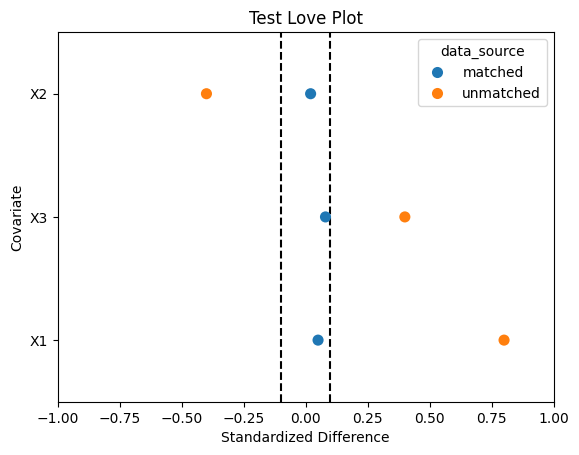

In [136]:
### test figure for build_love_plot ####
if __name__ == "__main__":
    test_std_diff_df = pd.DataFrame({'covariate': ['X1', 'X2', 'X3', 'X1', 'X2', 'X3'],
                                    'std_diff': [0.05, 0.02, 0.08, 0.8, -0.4, 0.4],
                                    'data_source': ['matched', 'matched', 'matched', 'unmatched', 'unmatched', 'unmatched']})

    fig, ax = plt.subplots()
    ax = build_love_plot(test_std_diff_df, ax)
    ax.set_title('Test Love Plot')
    ax.set_xlabel('Standardized Difference')
    ax.set_ylabel('Covariate')
    ax.set_xlim(-1, 1);

# Acknowledgements

This project uses Nick Huntington-Klein's `causaldata` package, which provides convenient access to the Lalonde dataset, and is based on Chapter 5 of Scott Cunningham's [Causal Inference: The Mixtape](https://mixtape.scunning.com/) as well as [Imbens and Xu 2024: Lalonde (1986) after Nearly Four Decades: Lessons Learned](https://arxiv.org/abs/2406.00827).